In [65]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [66]:
# Loading the dataset
df = pd.read_csv(r'T:\Machine Learning Course\Projects\Pakistani House Price Prediction\data\Entities.csv', sep=',')
df.head(3)

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008


In [67]:
df.rename(columns={df.columns[0]: 'Id'}, inplace=True)

In [68]:
df.columns

Index(['Id', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [69]:
df.describe()

,Id,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,168446.000000,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,84222.500000,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,48626.316059,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,0.000000,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,42111.250000,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,84222.500000,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,126333.750000,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,168445.000000,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Id             168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

In [71]:
df.isnull().sum()

Id                   0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [72]:
df['agency'].value_counts()

agency
Real Investment Consultants                794
Mash Allah Estate & Builders               708
Makkah Associates                          410
Arham Estate                               390
Chaudhry Estate                            389
                                          ... 
Dream Land Marketing                         1
Al Rehan Estate                              1
Estate Website                               1
Burki Estate                                 1
Khurram Marketing Real Estate & Builder      1
Name: count, Length: 5761, dtype: int64

In [73]:
df['agent'].value_counts()

agent
Boez Ayub                                                                      787
Azam Ali                                                                       684
Muhammad Imran                                                                 475
Kashif                                                                         398
Daud Ahmad(Co-CEO), Shafique Arshad Waince(Co-CEO), Zafar Iqbal Bajwa (CEO)    370
                                                                              ... 
Adil Yousaf                                                                      1
Abrar Abbas                                                                      1
Arsalan Ahmed                                                                    1
Mehar Salman                                                                     1
Babar Hameed, Raja Omar                                                          1
Name: count, Length: 10598, dtype: int64

In [74]:
df.duplicated().sum()

np.int64(0)

In [75]:
df['agency'] = df['agency'].fillna(df['agency'].mode()[0])

In [76]:
df['agent'] = df['agent'].fillna(df['agent'].mode()[0])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Id             168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         168446 non-null  object 
 16  agent          168446 non-null  object 
 17  Total_Area     168446 non-nul

In [78]:
df.isnull().sum()

Id               0
property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
Total_Area       0
dtype: int64

In [109]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [110]:
numerical_cols

Index(['location_id', 'price', 'latitude', 'baths', 'bedrooms', 'Total_Area',
       'price_log', 'Total_area_log'],
      dtype='object')

In [81]:

categorical_cols

Index(['page_url', 'property_type', 'location', 'city', 'province_name',
       'purpose', 'date_added', 'agency', 'agent'],
      dtype='object')

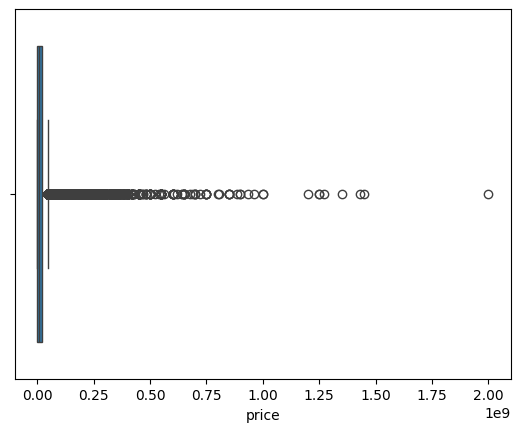

<Figure size 640x480 with 0 Axes>

In [82]:
sns.boxplot(x=df['price'])
plt.show()
plt.savefig(r'T:\Machine Learning Course\Projects\Pakistani House Price Prediction\Images\price_boxplot.png')

In [83]:
df['price'].describe()


count    1.684460e+05
mean     1.776576e+07
std      3.531003e+07
min      0.000000e+00
25%      1.750000e+05
50%      8.500000e+06
75%      1.950000e+07
max      2.000000e+09
Name: price, dtype: float64

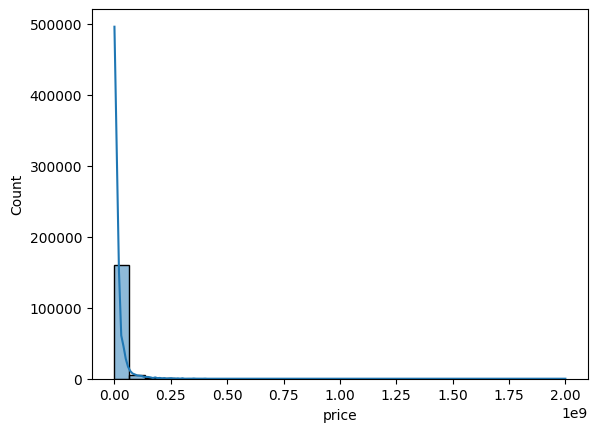

In [84]:
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.show()

In [85]:
df = df[df['price'] > 0]

In [86]:
df = df[df['Total_Area'] > 0]

In [87]:
df['price_log'] = np.log1p(df['price'])

In [88]:
df['Total_area_log'] = np.log1p(df['Total_Area'])

In [89]:
df['price_log'].describe()


count    168431.000000
mean         14.899347
std           2.696629
min           0.693147
25%          12.072547
50%          15.955577
75%          16.785925
max          21.416413
Name: price_log, dtype: float64

In [114]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()


In [102]:
corr['price_log'].sort_values(ascending=False)

price_log         1.000000
price             0.507139
bedrooms          0.346640
baths             0.269261
Total_area_log    0.059724
location_id       0.041359
Total_Area        0.003708
latitude         -0.163276
Name: price_log, dtype: float64

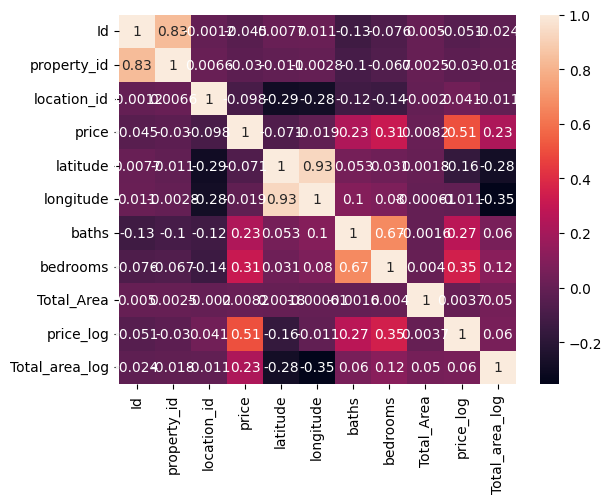

In [97]:
sns.heatmap(corr, annot=True)
plt.show()

In [93]:
df['Total_Area']

0          1089.004
1         15246.056
2          2178.008
3         10890.000
4          2178.008
            ...    
168441    26136.096
168442     2178.008
168443    26136.096
168444    21235.578
168445    25591.594
Name: Total_Area, Length: 168431, dtype: float64

In [94]:
df.columns

Index(['Id', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area', 'price_log', 'Total_area_log'],
      dtype='object')

In [96]:
df['Total_area_log'].describe()

count    168431.000000
mean          8.474999
std           1.187333
min           5.610391
25%           7.553159
50%           8.379543
75%           9.390998
max          19.640917
Name: Total_area_log, dtype: float64

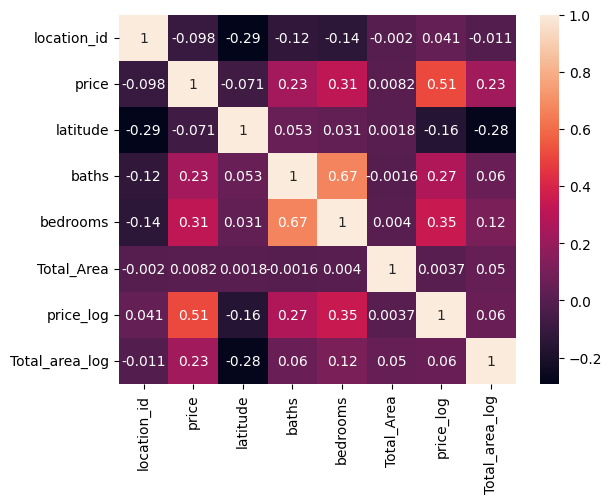

In [103]:
sns.heatmap(corr, annot=True)
plt.show()

In [104]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 168431 entries, 0 to 168445
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   location_id     168431 non-null  int64  
 1   property_type   168431 non-null  object 
 2   price           168431 non-null  int64  
 3   location        168431 non-null  object 
 4   city            168431 non-null  object 
 5   province_name   168431 non-null  object 
 6   latitude        168431 non-null  float64
 7   baths           168431 non-null  int64  
 8   purpose         168431 non-null  object 
 9   bedrooms        168431 non-null  int64  
 10  date_added      168431 non-null  object 
 11  Total_Area      168431 non-null  float64
 12  price_log       168431 non-null  float64
 13  Total_area_log  168431 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 19.3+ MB


In [105]:
df.describe()

,location_id,price,latitude,baths,bedrooms,Total_Area,price_log,Total_area_log
count,168431.000000,1.684310e+05,168431.000000,168431.000000,168431.000000,1.684310e+05,168431.000000,168431.000000
mean,4376.050555,1.776666e+07,29.859352,2.874269,3.179498,1.394335e+04,14.899347,8.474999
std,3776.521214,3.531136e+07,3.807905,2.463422,1.971383,8.624031e+05,2.696629,1.187333
min,1.000000,1.000000e+00,11.052446,0.000000,0.000000,2.722510e+02,0.693147,5.610391
25%,1058.000000,1.750000e+05,24.948515,0.000000,2.000000,1.905757e+03,12.072547,7.553159
50%,3286.000000,8.500000e+06,31.459784,3.000000,3.000000,4.356016e+03,15.955577,8.379543
75%,7220.000000,1.950000e+07,33.560887,4.000000,4.000000,1.197904e+04,16.785925,9.390998
max,14220.000000,2.000000e+09,73.184088,403.000000,68.000000,3.387988e+08,21.416413,19.640917


In [112]:
df.drop(columns=['Total_Area', 'price'], inplace=True)

In [121]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

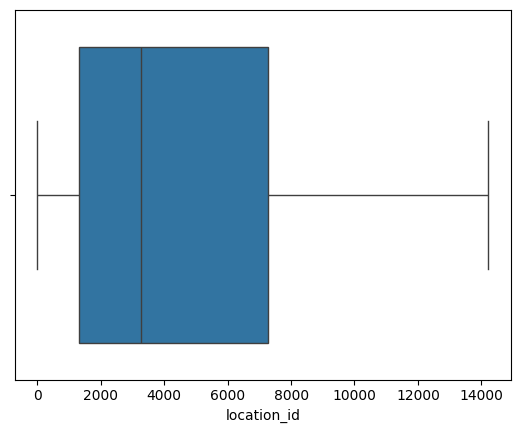

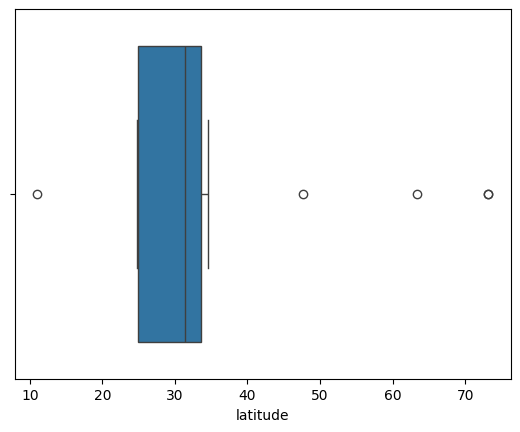

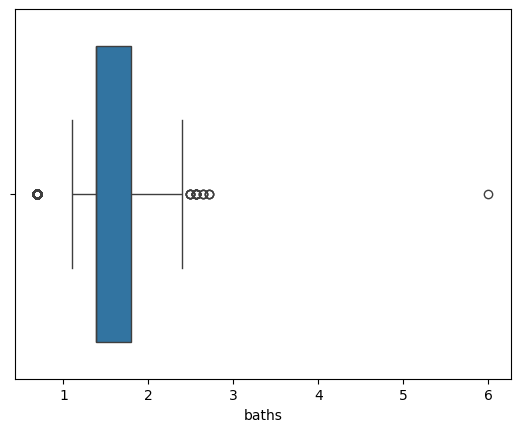

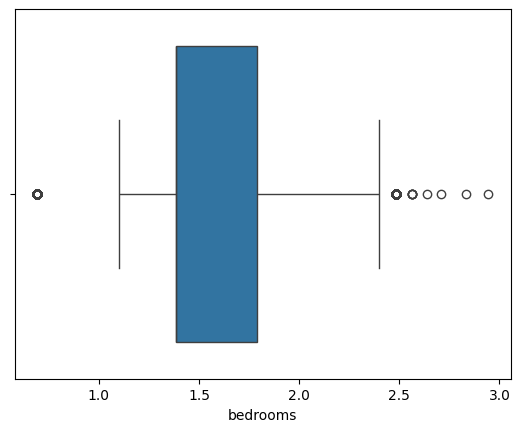

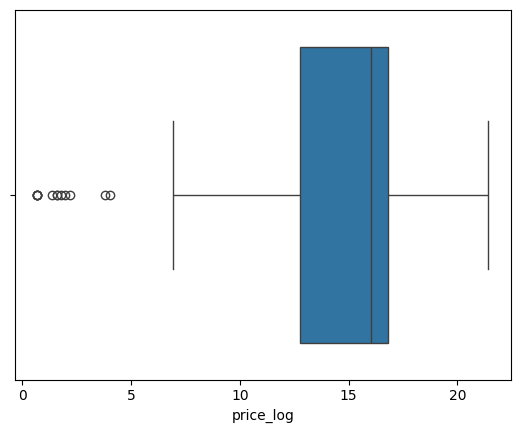

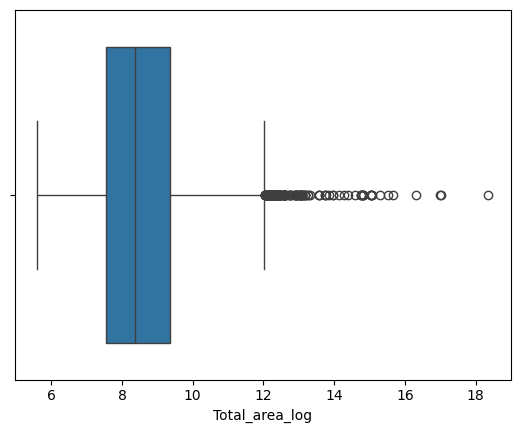

In [122]:
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.show()

In [120]:
df = df[df['bedrooms'] > 0]
df = df[df['baths'] > 0]
df['bedrooms'] = np.log1p(df['bedrooms'])
df['baths'] = np.log1p(df['baths'])

In [123]:
df.describe()

,location_id,latitude,baths,bedrooms,price_log,Total_area_log
count,125613.000000,125613.000000,125613.000000,125613.000000,125613.000000,125613.000000
mean,4372.989340,29.698870,1.511173,1.485510,15.045908,8.473786
std,3764.251178,3.831038,0.365596,0.332482,2.617970,1.165491
min,1.000000,11.052446,0.693147,0.693147,0.693147,5.610391
25%,1312.000000,24.941744,1.386294,1.386294,12.765691,7.553159
50%,3283.000000,31.452023,1.386294,1.386294,16.034714,8.379543
75%,7269.000000,33.550869,1.791759,1.791759,16.811243,9.344482
max,14220.000000,73.184088,6.001415,2.944439,21.416413,18.356396


In [124]:
df.to_csv(r'T:\Machine Learning Course\Projects\Pakistani House Price Prediction\data\Processed_Data.csv', index=False)